In [41]:
import random
from Graph import Graph
#from Facades.SmartRouteMakerFacade import SmartRouteMakerFacade as srm
import math
import pandas
import osmnx as ox
from networkx import MultiDiGraph
import json
from turtle import st
from typing import Tuple
from Planner import Planner
import numpy as np
from Analyzer import Analyzer
import timeit
from timeit import default_timer as timer




# self.analyzer = Analyzer.Analyzer()
# self.visualizer = Visualizer.Visualizer()
# self.graph = Graph.Graph()
# self.planner = Planner.Planner()

# "need to be deleted and implemented in huidige code"
def normalize_coordinates(coordinates: str, delimiter: str = ",") -> Tuple:
        """Converts a front-end inputted coordinate string into a tuple of two floats.

        Args:
            coordinates (str): String of two delimited coordinates
            delimiter (str, optional): The delimiter. Defaults to ",".

        Returns:
            Tuple: (x.xx, y.yy) tuple of normalized coordinates.
        """

        return tuple([float(coordinate.strip()) for coordinate in coordinates.split(delimiter)])  


    
#     # coordinates are (lat, lon)
def circuit_gen_k(graph: MultiDiGraph, start_node: int, max_length:int, i_points: int, max_height:int, max_incline:int):
    """"


    
    """
    variance = 1.2
    angle = np.linspace(0, 2*np.pi, 360) 
    direction = angle[random.randint(0,359)]
    radius = max_length / math.pi / 2
    difference_lon = math.cos(direction)* radius * variance / 111000
    difference_lat = math.sin(direction)* radius * variance / 111000
    x=float(graph.nodes[start_node]["x"]) + float(difference_lon)
    y=float(graph.nodes[start_node]["y"]) + float(difference_lat)
    center = ox.nearest_nodes(graph, x , y)



    
    circle_dpoints = i_points
    points_data = dict()
    points = []
    angle = np.linspace(0, 2*np.pi, circle_dpoints) 
    for i in angle:
        degree = i
        difference_lon = math.cos(degree)* radius * variance / 111000
        difference_lat = math.sin(degree)* radius * variance / 111000
        y = float(graph.nodes[center]["y"]) + float(difference_lat)
        x = float(graph.nodes[center]["x"]) + float(difference_lon)
        # print("x = "+ str(x))
        # print("y = " + str(y))
        cirkel_node = ox.nearest_nodes(graph, x, y)
        # print(cirkel_node)
        points_data[cirkel_node]=graph.nodes[cirkel_node]
        points.append(cirkel_node)
    # print(points)

    #make route
    planner = Planner()
    analyzer = Analyzer()
    loss = float("inf")
    for i in range(0,5):
        change = 500
        cyclus_temp = []
        cyclus_length_temp = 0
        if i > 0:
             distances = []
             new_points =[]
             for p in points:
                angle = np.linspace(0, 2*np.pi, circle_dpoints) 
                
                degree = random.choice(angle)
                difference_lon = math.cos(degree)* (change / 111000)
                difference_lat = math.sin(degree)* (change / 111000)
                y = float(graph.nodes[p]["y"]) + float(difference_lat)
                x = float(graph.nodes[p]["x"]) + float(difference_lon)

                if p == 0 or p =="0": #something happens here that i don't know how to fix
                    continue
                new_cirkel_node = ox.nearest_nodes(graph, x, y)
                # print(f"new node: {new_cirkel_node}")
                
                # distances.append(euclidian_distance_nodes(graph, new_cirkel_node, p))
                # closest_node = min(distances)
                new_points.append(new_cirkel_node)
                # points.insert(i,new_cirkel_node)
                # points.remove(p)
                # print(points)
             points = new_points
             print(points)
        # print(f"cyclus:{i}")
        
        for waypoint_start in range(0,len(points)-1):
            # print(f"start: {waypoint_start}")
            waypoint_end = waypoint_start+1
            #not needed because the last point is always the first because you go full circle
            if waypoint_end >= len(points):
                waypoint_end = 0
            if points[waypoint_end] == 0 or points[waypoint_end] == "0": #some BULLSHIT happens here that i don't know how to fix
                continue
            #merge the subsections
            for m in planner.shortest_path(graph,points[waypoint_start],points[waypoint_end]):
                # print(f"node:{m}")
                cyclus_temp.append(m)
            cyclus_length_temp += analyzer.shortest_path_length(graph,points[waypoint_start],points[waypoint_end])
        
        if len(cyclus_temp) != len(set(cyclus_temp)):
            duplicates = []
            #find all duplicates
            for i, item in enumerate(cyclus_temp):
                if cyclus_temp.count(item) > 1 and item not in duplicates:
                    duplicates.append(item)
            for p in points:
                #check of er naast ieder point duplicaten aan waardes zitten en verwijder deze todat je geen duplicaten meer tegenkomt
                p_index = cyclus_temp.index(p)
                check = True
                difference = 1
                to_delete = [] #list of indexen
                
                deleted = False
                while check:
                    if p == points[-1]:
                        check = False
                        
                    else:
                        if cyclus_temp[p_index-difference]==cyclus_temp[p_index+difference]:
                            to_delete.append(p_index-difference)
                            to_delete.append(p_index+difference)
                            deleted = True
                        else:
                            check = False
                        difference += 1
                if deleted == True:
                    del to_delete[-1]#zorgt ervoor dat het verbind stuk blijft
                    to_delete.append(p_index)
                    


                for r in to_delete:
                    del cyclus_temp[r]
            '''
            vervang een point door het dichtsbijzijnde duplicate punt dat nog steeds in de route zit.
            '''
            for p in points:
                if p == 0 or p == "0": #something happens here that i don't know how to fix
                    continue
                distances = []
                if p not in cyclus_temp:
                    continue
                    #move p to fit on cyclus temp

            # for dupe in duplicates: #ga door duplicates heen
            #     if dupe in cyclus_temp: #check of de duplicate (NOG) in de route zit
            #         distances = []
            #         for p in points: #vergelijk de duplicate met het dichtsbijzijnde punt
            #             if p == 0 or p == "0": #something happens here that i don't know how to fix
            #                 continue
            #             distances.append(euclidian_distance_nodes(graph, dupe, p))
            #         #verwijder het punt uit points en voeg de duplicate toe aan points
            #         closest_node = points[distances.index(min(distances))]
            #         points.insert(dupe,points.index(closest_node))
            #         points.remove(points[points.index(closest_node)+1])
            
            # cyclus_length_temp = 0
            # cyclus_temp = []
            # for i in range(0,len(points)-1):
            #     j= i+1
            #     if j > len(points):
            #         j = 0
            #     print(points[i])
            #     print(points[j])
            #     if points[j] == 0 or "0": #something happens here that i don't know how to fix
            #         continue
            #     for m in planner.shortest_path(graph,points[i],points[j]):
            #         cyclus_temp.append(m)
            #     cyclus_length_temp += analyzer.shortest_path_length(graph,points[i],points[j])
        print(f"oude loss: {loss}")
        
        new_loss = get_loss(cyclus_length_temp, max_length)
        print(f"nieuwe loss: {new_loss}")
        if loss > new_loss: 
            loss = new_loss
            cyclus = cyclus_temp
            cyclus_length = cyclus_length_temp
        
    print(cyclus)
    print(cyclus_length)    
    return cyclus, cyclus_length


def euclidian_distance_nodes(graph, node1, node2):
    x1 = graph._node[node1]["x"]
    y1 = graph._node[node1]["y"]
    x2 = graph._node[node2]["x"]
    y2 = graph._node[node2]["y"]
    distance = ((x2-x1)**2+(y2-y1)**2)**0.5
    return distance

def get_loss(route_dist, kms_target, height = 0, height_target = 0):
    
  dist_delta = abs(kms_target - route_dist*1000)
  loss_dist = dist_delta
  loss_height = abs(height - height_target)
  loss = loss_dist + loss_height # + height, inlcine,
  return loss     

path, length =  circuit_gen_k(graph, start_node, k, 5, 100, 10)


oude loss: inf
nieuwe loss: 660.0
[154575529, 274758964, 60784734, 126666742, 150447925]
oude loss: 660.0
nieuwe loss: 1720.0
[154575529, 267418185, 9988955842, 2125562523, 151182524]
oude loss: 660.0
nieuwe loss: 1840.0000000000036
[154575529, 267420655, 2673348577, 7610824670, 154575529]
oude loss: 660.0
nieuwe loss: 2440.0
[154575529, 262655095, 1932929314, 2219092495, 154575480]
oude loss: 660.0
nieuwe loss: 869.9999999999964
[8414922656, 269337045, 518537348, 1964202813, 518537350, 9959314836, 7483503169, 7223808736, 8432462434, 518537330, 7223808724, 7223808733, 518537327, 9959315219, 7645877132, 5012074419, 518537324, 518537316, 518537325, 1279315563, 2041139061, 2001020458, 1921561654, 1921557934, 34035255, 1921557933, 1957538100, 1642008017, 180216347, 5300597905, 34025535, 243211992, 5854431529, 2395331152, 1843199580, 2395331147, 1843199586, 828190572, 34025538, 180216388, 8433665826, 4161859546, 249079736, 249079739, 5311939724, 262648167, 262648163, 262648159, 27502885, 15

In [3]:

#k is afstand in meter van route
k = 30000
start_point =str(50.880848676808334)+","+str(5.960501432418824)
graph_class = Graph()

print(start_point)
start_coordinates = normalize_coordinates(start_point)
graph = Graph.full_geometry_point_graph(graph_class, start_coordinates, radius= .5*k) 


print(graph)
X,Y = start_coordinates
start_node = ox.nearest_nodes(graph, X, Y) 

# k_values = [3,4,5,6,7,8,9,10]
# kilometers = [5000,10000,15000,20000,25000,30000,35000,40000]
# # for i in range(0,len(kilometers)):
# #     for j in range(0,len(k_values)):
# #         start_time = timeit.default_timer()
# #         path =  circuit_gen_k(graph, start_node, kilometers[i],k_values[j])
# #         end_time = timeit.default_timer()
# #         print("kilometers = ", kilometers[i],"\naantal punten op cirkel = ", k_values[j],"\nExecution time : ", end_time -start_time)
    

# # pause = input("pause")



50.880848676808334,5.960501432418824
MultiDiGraph with 78051 nodes and 198120 edges


In [4]:
som=0
# for i in graph:
#     print(i,end="\t")
#     print(graph.nodes(data=True),"\n")
#     break
#     som+=1
print(graph._node[1848026])

print(euclidian_distance_nodes(graph, 1848026, 42128077))
print(graph)
print(som)

KeyError: 1848026

In [ ]:
ox.basic_stats(graph)

{'n': 119501,
 'm': 305832,
 'k_avg': 5.11848436414758,
 'edge_length_total': 29793557.0360004,
 'edge_length_avg': 97.4180498966766,
 'streets_per_node_avg': 2.756487393410934,
 'streets_per_node_counts': {0: 0,
  1: 22800,
  2: 724,
  3: 79278,
  4: 16227,
  5: 422,
  6: 47,
  7: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.19079338248215497,
  2: 0.006058526706889482,
  3: 0.6634086744043983,
  4: 0.13578965866394424,
  5: 0.0035313512020819907,
  6: 0.0003933021480991791,
  7: 2.5104392431862494e-05},
 'intersection_count': 96701,
 'street_length_total': 15668055.336999958,
 'street_segment_count': 164534,
 'street_length_avg': 95.22685485674668,
 'circuity_avg': 1.06052786575107,
 'self_loop_proportion': 0.0037317514920928198}

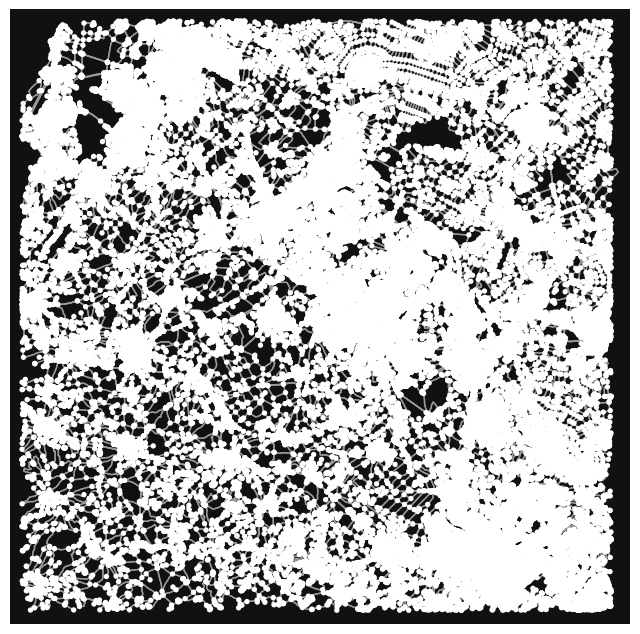

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [8]:
ox.plot_graph(graph,)

In [40]:
start = timer()
path, length =  circuit_gen_k(graph, start_node, k, 5, 100, 10)
end = timer() # in seconds
print(f"start : {start} \nend: {end} \ntime elapsed: ", end - start)
# path, length =circuit_gen_k(graph, start_node, k, 4)
print("path =", end = " ")
print(path)
print("lengte = " , length)
print("finished")
# print("length =", end = " ")
# print(length)




oude loss: inf
nieuwe loss: 1970.0000000000036
[154575529, 267007851, 2046233148, 60406375, 154575529]
oude loss: 1970.0000000000036
nieuwe loss: 2510.0000000000036
[8414922656, 267007970, 60202305, 2213525833, 154575529]
oude loss: 1970.0000000000036
nieuwe loss: 940.0
[150447925, 275223997, 173626459, 60406375, 154575480]
oude loss: 940.0
nieuwe loss: 1880.0
[8414922656, 275223997, 90286256, 2219228105, 154575480]
oude loss: 940.0
nieuwe loss: 1689.9999999999964
[8414922656, 269337045, 518537348, 1964202813, 518537350, 9959314836, 7483503169, 7223808736, 8432462434, 518537330, 7223808724, 7223808733, 518537327, 9959315219, 7645877132, 5012074419, 518537324, 518537316, 518537325, 1279315563, 2041139061, 2001020458, 1921561654, 1921557934, 34035255, 1921557933, 1957538100, 1642008017, 180216347, 5300597905, 34025535, 243211992, 5854431529, 2395331152, 1843199580, 2395331147, 1843199586, 828190572, 34025538, 180216388, 8433665826, 4161859546, 249079736, 249079739, 5311939724, 262648167,